In [8]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage


In [3]:
llm = ChatOpenAI(model="gpt-4o-mini", streaming=True)

In [4]:
def get_weather(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always sunny in {city}!"

def add_numbers(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

def multiply_numbers(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

agent = create_react_agent(
    model=llm,
    tools=[get_weather, add_numbers, multiply_numbers],
    prompt="You are a helpful assistant that can use the following tools: get_weather, add_numbers for addition, multiply_numbers for multiplication"
)

# Run the agent
agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='ecd8958b-f0fe-4132-979c-178eeae82ad3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_ECEDplLCzZZ1nLw3Gxr3rvTh', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'service_tier': 'default'}, id='run--b9b425ef-9b1a-4642-89f5-bad34de730a6-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, 'id': 'call_ECEDplLCzZZ1nLw3Gxr3rvTh', 'type': 'tool_call'}]),
  ToolMessage(content="It's always sunny in San Francisco!", name='get_weather', id='90a44e22-3611-4a6e-8509-40d34673cfa3', tool_call_id='call_ECEDplLCzZZ1nLw3Gxr3rvTh'),
  AIMessage(content='The weather in San Francisco is always sunny!', additional_kwargs={}, response_metadata={'finish_reason'

In [9]:
agent.invoke({"messages": [{"role": "user", "content": "what is 5 +  (5 * 2)"}]})

{'messages': [HumanMessage(content='what is 5 +  (5 * 2)', additional_kwargs={}, response_metadata={}, id='2a17d779-465e-4f5f-92f8-69b5b6ed18d1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_JhcdROGft4GjF261HDrDiGhn', 'function': {'arguments': '{"a": 5, "b": 2}', 'name': 'multiply_numbers'}, 'type': 'function'}, {'index': 1, 'id': 'call_pS9bfUNDXH9AXRvgycfwuf5u', 'function': {'arguments': '{"a": 5, "b": 0}', 'name': 'add_numbers'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'service_tier': 'default'}, id='run--d081ed27-93b3-4fbe-aaca-1e90e7d33382-0', tool_calls=[{'name': 'multiply_numbers', 'args': {'a': 5, 'b': 2}, 'id': 'call_JhcdROGft4GjF261HDrDiGhn', 'type': 'tool_call'}, {'name': 'add_numbers', 'args': {'a': 5, 'b': 0}, 'id': 'call_pS9bfUNDXH9AXRvgycfwuf5u', 'type': 'tool_call'}]),
  ToolMessage(content='10', name='multiply_numbers', i

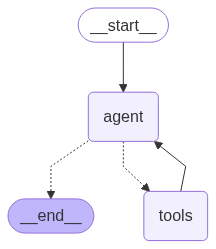

In [10]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

In [9]:
async for chunk in agent.astream({"messages": [HumanMessage("what is the weather in sf")]}):
    print("New chunk", chunk)

New chunk {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_Dksfem803HvNvb7YM6MxUL7F', 'function': {'arguments': '{"city":"San Francisco"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', 'service_tier': 'default'}, id='run--cb6a383e-1449-4976-8cf6-820148dfae05-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'San Francisco'}, 'id': 'call_Dksfem803HvNvb7YM6MxUL7F', 'type': 'tool_call'}])]}}
New chunk {'tools': {'messages': [ToolMessage(content="It's always sunny in San Francisco!", name='get_weather', id='b1675488-bbe8-4189-96f6-850505741cc0', tool_call_id='call_Dksfem803HvNvb7YM6MxUL7F')]}}
New chunk {'agent': {'messages': [AIMessage(content='The weather in San Francisco is always sunny!', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-4o-mini-2024-07-18', 's

In [15]:
async for chunk in agent.astream({"messages": [HumanMessage("what is the weather in sf")]}, stream_mode="messages"):
    print("New chunk", chunk[0])
    print("New Metadata", chunk[1])

New chunk content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_xnDzXEj47S8QylDhiT1ufqiQ', 'function': {'arguments': '', 'name': 'get_weather'}, 'type': 'function'}]} response_metadata={} id='run--82992c0b-0dee-4c0e-b069-ad2792222011' tool_calls=[{'name': 'get_weather', 'args': {}, 'id': 'call_xnDzXEj47S8QylDhiT1ufqiQ', 'type': 'tool_call'}] tool_call_chunks=[{'name': 'get_weather', 'args': '', 'id': 'call_xnDzXEj47S8QylDhiT1ufqiQ', 'index': 0, 'type': 'tool_call_chunk'}]
New Metadata {'langgraph_step': 1, 'langgraph_node': 'agent', 'langgraph_triggers': ('branch:to:agent',), 'langgraph_path': ('__pregel_pull', 'agent'), 'langgraph_checkpoint_ns': 'agent:2aa0cca0-a5c0-c8d9-7f53-b85b86afc5d3', 'checkpoint_ns': 'agent:2aa0cca0-a5c0-c8d9-7f53-b85b86afc5d3', 'ls_provider': 'openai', 'ls_model_name': 'gpt-4o-mini', 'ls_model_type': 'chat', 'ls_temperature': None}
New chunk content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': None, 'function': {'arguments': '{"', '